# Camera Calibatrion
O objetivo desse trabalho é utilizar diversas maneiras de se realizar a calibração de câmera e comparar os resultados obtidos. Calibrar a câmera significa determinar os parametros intrisecos da mesma:
* focal length: `f`
* pixel size: `sx`, `sy`
* distortion coeficients: `k1`, `k2`...
* principal point: `cx`, `cy`

Serão usados três métodos distintos para obter esses parâmetros:
* Método Ingênuo
* Utilizando a ferramenta toolbox
* Método com a extração do autovetor usando a função SVD

## Método Ingênuo

### 1° passo
Take a awesome picture

* Distancia livro -> camera (dZ): 52 cm
* Comprimento livro (dX): 28,3 cm
* Largura livro (dY): 22 cm

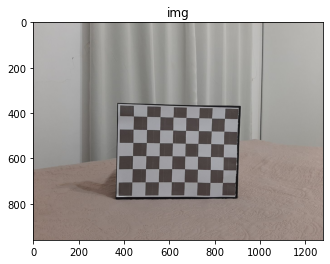

In [4]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('img2.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

* Comprimento do livro em pixels (dx): 543 pixels
* Largura do livro em pixels (dy): 423 pixels

Usando a equação de projeção perspectiva, é possível calcular a distancia focal tanto em x quanto em y. Para o cálculo de x temos que:

In [6]:
%%latex
\begin{equation}
f{x} = \frac{d{x}}{d{X}}*d{z}
\end{equation}

<IPython.core.display.Latex object>

Substituindo os valores encontrados:

In [5]:
%%latex
\begin{equation}
f{x} = \frac{543\hspace{1mm}px}{28,3\hspace{1mm}cm}*52\hspace{1mm}cm = 997,73\hspace{1mm}px
\end{equation}

<IPython.core.display.Latex object>

O mesmo para y:

In [6]:
%%latex
\begin{equation}
f{x} = \frac{d{y}}{d{Y}}*d{z} = \frac{423\hspace{1mm}px}{22\hspace{1mm}cm}*52\hspace{1mm}cm = 999,81\hspace{1mm}px
\end{equation}

<IPython.core.display.Latex object>

Como este é um método simplificado, é definido que os pontos centrais `cx` e `cy` são encontrados no centro da imagem. As dimensões da imagem são 1280 x 960 px. Portanto, a matriz de parametros intrisecos é tal que:

In [7]:
%%latex
\begin{equation}
M{int} = 
\begin{pmatrix}
f{x} & 0 & \frac{cols}{2} \\ 
0 & f{y} & \frac{rows}{2}\\ 
0 & 0 & 1
\end{pmatrix}
= 
\begin{pmatrix}
997,73 & 0 & \frac{1280}{2} \\ 
0 & 999,81 & \frac{960}{2}\\ 
0 & 0 & 1
\end{pmatrix}
=
\begin{pmatrix}
997,73 & 0 & 640 \\ 
0 & 999,81 & 480 \\ 
0 & 0 & 1
\end{pmatrix}
\end{equation}

<IPython.core.display.Latex object>

E então o método naive está concluido.

## Utilizando o toolbox
As fotos que serão usados para a calibração são as de um tabuleiro. Duas fotos são mostradas abaixo, mas no experimento foram utilizadas 9 fotos para uma maior precisão.

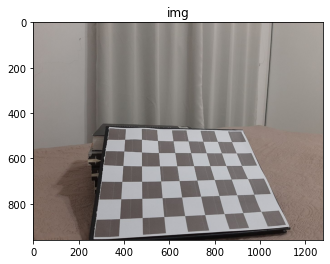

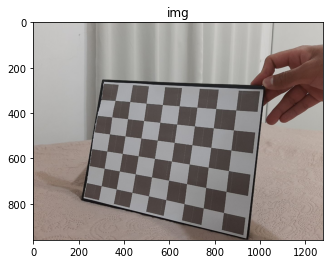

In [30]:
from matplotlib import pyplot as plt
import cv2

# Imagem 1
img = cv2.imread('board-photos/Image_5.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

# Imagem 2
img = cv2.imread('board-photos/Image_4.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

O tamanho de cada quadradinho do tabuleiro é de 30mm (dx e dy). Usando essa informação e com uma window size of the corner finder de 5 x 5, podemos começar a utilizar a ferramenta. O primeiro passo é adicionar todas as 9 fotos ao Octave:

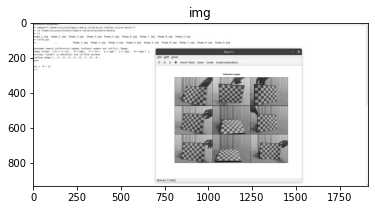

In [8]:
img = cv2.imread('steps-octave/step_1.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

Seguindo os passos do Octave, para cada foto são feitas algumas indicações para que o software localize os eixos de coordenadas:

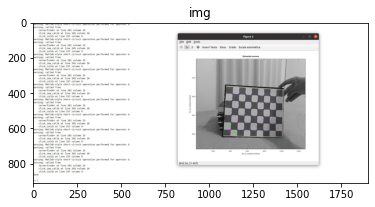

In [9]:
img = cv2.imread('steps-octave/step_2.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

Após isso, o próprio software calcula os parâmetros intrísecos da câmera:

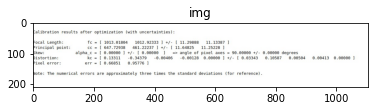

In [11]:
img = cv2.imread('steps-octave/step_3.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

Deixando os resultados mais claros, a matriz de parametros intrisecos calculada pelo Octave foi a seguinte:

In [18]:
%%latex
\begin{equation}
f{x} = 1013,01\hspace{1mm}px \pm 11,29
\end{equation}
\begin{equation}
f{y} = 1012,92\hspace{1mm}px \pm 11,13
\end{equation}
\begin{equation}
c{x} = 647,72\hspace{1mm}px \pm 11,64
\end{equation}
\begin{equation}
c{y} = 461,22\hspace{1mm}px \pm 11,25
\end{equation}
\begin{pmatrix}
1013,01 & 0 & 647,72 \\ 
0 & 1012,92 & 461,22 \\ 
0 & 0 & 1
\end{pmatrix}

<IPython.core.display.Latex object>

## Método utilizando a função SVD

Primeiramente, é tirada a foto:


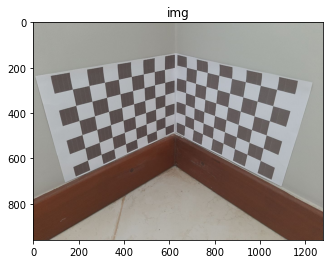

In [20]:
img = cv2.imread('step3_board.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

E então foram caculados 20 pontos no mundo, considerando a origem na quina superior direita do primeiro quadradinho da primeira coluna do board da esquerda. Os pontos medidos estão mostrados na imagem abaixo:

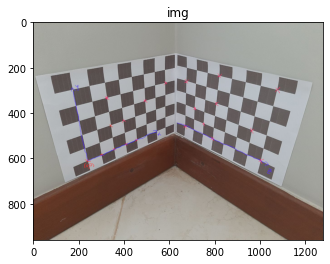

In [21]:
img = cv2.imread('step3_points.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('img')
plt.show()

In [23]:
number_of_points = 20

world_points = [
    [0,0,0],
    [30,0,0],
    [60,0,0],
    [90,0,0],
    [120,0,0],
    [60,60,0],
    [90,60,0],
    [150,90,0],
    [60,120,0],
    [210,120,0],
    [240,0,30],
    [240,60,60],
    [240,0,120],
    [240,30,90],
    [240,120,30],
    [240,90,120],
    [240,150,240],
    [240,60,210],
    [240,150,120],
    [240,0,240]
]

image_points = [
    [242,610],
    [302,584],
    [359,561],
    [410,538],
    [459,518],
    [344,455],
    [399,435],
    [495,348],
    [327,334],
    [584,268],
    [672,458],
    [713,380],
    [794,514],
    [753,447],
    [677,260],
    [809,359],
    [1077,298],
    [966,476],
    [823,237],
    [1005,612]
]